# Generalized Linear Models (MACS 30100)
### by [Benjamin Soltoff](http://www.bensoltoff.com/) and [Richard W. Evans](https://sites.google.com/site/rickecon/), February 2018
The code in this Jupyter notebook was written using Python 3.6. It uses data files `?`, and ? image files in the `images` folder in the same directory as this notebook. For the code to run properly, you will either need to have access to the internet or you should have the data file in the same folder as the Jupyter notebook file. Otherwise, you will have to change the respective lines of the code that read in the data to reflect the location of that data. Much of this content was taken from Dr. Benjamin Soltoff's notes [here](http://cfss.uchicago.edu/persp005_glm.html).

## 1. The General Specification
Generalized linear models (GLMs) are a general formulation of linear models for cases in which the error terms can have a general distribution (not necessarily the Normal distribution) and also cases in which the dependent variable is a categorical variable (non necessarily binary). GLMs are typically estimated using maximum likelihood estimation, though they can also be estimated using generalized method of moments as well as Bayesian estimation.

A GLM consists of three components:
1. A **random component** specifying the conditional distribution of the response variable, $Y_i$, given the values of the dependent (predictor) variables in the model. Typically these distributions are a member of the [exponential family](https://en.wikipedia.org/wiki/Exponential_family), a set of related probability distributions.

2. A **linear predictor** that is a linear function of regressors.The regressors are prespecified functions of the explanatory variables. This is exactly like the form you’ve seen for linear and logistic regression, because in fact linear and logistic regression are types of GLMs.

$$ \eta_i = \beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i} + ... \beta_P x_{P,i} $$

3. A **link function** $g(\cdot)$, which transforms the expectation of the response variable $\mu_i \equiv E(Y_i)$ to the linear predictor.

$$ g(\mu_i) = \eta_i = \beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i} + ... \beta_P x_{P,i} $$

* Because the link function must also be **invertible**, we can also write it as the following.

$$ \mu_i = g^{-1}(\eta_i) = g^{-1}\left(\beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i} + ... \beta_P x_{P,i}\right) $$

* The inverted link function is also known as the **mean function**. The purpose of the link function is to relate the linear predictor to the mean of the distribution function.

The GLM approach allows us to embed a linear predictor, which is fairly easy to interpret, into a wide class of nonlinear models with a wide range of error distributions.

### 1.1. Linear regression as a GLM
The linear regression that we studied in the [Linear Regression Notebook](https://github.com/UC-MACSS/persp-model_W18/blob/master/Notebooks/LinRegress/LinRegress.ipynb) is the simplest special case of a GLM. However, the GLM linear regression does not necessarily assume that the errors are normally distributed. The errors can come from any distribution.

The linear regression model is the following, where we specify a generic PDF for the error terms $u_i$.

$$ y_i = \beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i} + ... \beta_P x_{P,i} + u_i \quad\text{where}\quad u_i\sim i.i.d.(0, \sigma) $$

In every case (not just linear regression), the $\eta$ function is the linear portion of the linear regression, excluding the error terms.

$$ \eta_i = \beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i} + ... \beta_P x_{P,i} $$

In the regression equation, we know that the expected value of $Y_i$ is the linear predictor $\eta_i$, which is a link function of the mean of the errors.

$$ E[Y=y_i|X\beta] = g(\mu_i=0) = \eta_i = \beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i} + ... \beta_P x_{P,i} $$

As we did in Section 6 of the [Maximum Likelihood Estimation notebook](https://github.com/UC-MACSS/persp-model_W18/blob/master/Notebooks/MLE/MLest.ipynb), we estimate this GLM version of a linear regression by maximum likelihood. Note that this allows us to have more general assumptions on the errors.

### 1.2. Logistic regression
The logistic regression that we covered in the [Classifiers 1 notebook](https://github.com/UC-MACSS/persp-model_W18/blob/master/Notebooks/Classfcn1/KKNlogitLDA.ipynb) is also a special case of GLM. To characterize the logistic model as a GLM, we assume that the  probability of binary outcome $y_i=1$ given data $X_i$ and parameter vector $\beta$ is $\mu_i$.

$$ Pr(y_i=1|X\beta) = \mu_i \quad\text{and}\quad Pr(y_i=0|X\beta) = 1 - \mu_i $$

The linear predictor is the same $\eta_i$.

$$ \eta_i = \beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i} + ... \beta_P x_{P,i} $$

The link function $g(\mu_i)$ is the logistic function.

$$ g(\mu_i) = \frac{e^{\eta_i}}{1 + e^{\eta_i}} $$

So the probability of $Y=y_i\in\{0,1\}$ is the Bernoulli distribution.

$$ Pr(Y=y_i|X\beta) = \mu_i^{y_i}(1 - \mu_i)^{y_i} $$

The link function is called the log-odds function.

$$ \ln\left(\frac{\mu_i}{1 - \mu_i}\right) = \eta_i = \beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i} + ... \beta_P x_{P,i} $$

As was shown in the [Classifiers 1 notebook](https://github.com/UC-MACSS/persp-model_W18/blob/master/Notebooks/Classfcn1/KKNlogitLDA.ipynb), we estimate the parameters of the logistic regression function by maximum likelihood.

### 1.3. Multinomial logistic regression
Multinomial logistic regression is a model for estimating or predicting the effects on independent variables (i.e., features, regressors) on a categorical dependent variable with more than two categories: $y_i\in\{1,2,... J\}$. Multinomial logistic regression generalizes the logit model to a **polytomy** (more than 2 outcomes) dependent variable $y_i$.

Let the linear predictor of features or independent variables or regressors be similar to the old $\eta_i$. The difference is that we need a linear predictor for each possible type $j$. This means that we will estimate a different set of coefficients $\beta_j$ in the linear predictor for each type $j$.

$$ \eta_{j,i} = \beta_{j,0} + \beta_{j,1} x_{1,i} + \beta_{j,2} x_{2,i} + ... \beta_{j,P} x_{P,i} $$

We are interested in estimating or predicting the probability $\mu_{j,i}$ that the observation is of class $j\in\{1,2,...J\}$. We can model the probability of $y_i=j$ by a similar logistic function.

$$ Pr(y_i=j|X\beta) = \mu_{j,i} = \frac{e^{\eta_{j,i}}}{1 + \sum_{k=1}^{J-1} e^{\eta_{k,i}}} = \frac{e^{\beta_{j,0} + \beta_{j,1} x_{1,i} + \beta_{j,2} x_{2,i} + ... \beta_{j,P} x_{P,i}}}{1 + \sum_{k=1}^{J-1} e^{\beta_{k,0} + \beta_{k,1} x_{1,i} + \beta_{k,2} x_{2,i} + ... \beta_{k,P} x_{P,i}}} \quad\text{for}\quad j=1,2,...J-1 $$

Note the $J-1$ limit of the sum in the denominator of the logistic function. What we are doing is estimating a logistic model for each type, where the cumulative sum in the denominator leaves out a baseline category. It would be redundant or multicollinear if we included it because of the restriction that the probabilities must sum to 1. So, without loss of generality, we name the baseline category as the last category $y_i=J$, and its probability is a function of all the other estimated logistic models for $j=1,2,...J-1$.

$$ \mu_{J,i} = 1 - \sum_{j=1}^{J-1}\mu_{j,i} \quad\text{because}\quad \sum_{j=1}^J \mu_{j,i} = 1 $$

Because the numerator in the multinomial logistic function does not include interaction terms between the coefficients of the other multinomial logistic equations, this estimation relies on the assumption of [independence of irrelevant alternatives](https://en.wikipedia.org/wiki/Independence_of_irrelevant_alternatives). This assumption may be violated in some cases.

With some algebraic manipulation, the link function of the multinomial logistic regression is also a log odds function, where the denominator probability is the baseline probability $\mu_{J,i}$.

$$ \ln\left(\frac{\mu_{j,i}}{\mu_{J,i}}\right) \quad\text{for}\quad j=1,2,...J-1 $$

We can estimate all the coefficients $\beta_{j,p}$ of this model by maximum likelihood estimation.

#### 1.3.1. Multinomial logistic example using Titanic data
Let's go back to the Titanic dataset that we used in the logistic regression section of the [Classifiers notebook](https://github.com/UC-MACSS/persp-model_W18/blob/master/Notebooks/Classfcn1/KKNlogitLDA.ipynb).

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
from pylab import rcParams

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

url = ('https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/' +
      'master/titanic-train.csv')
titanic = pd.read_csv(url)
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age',
                   'SibSp','Parch','Ticket','Fare','Cabin','Embarked']
titanic.head()

/Users/laurencewarner/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Greenberg, Mr. Samuel",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


This time, instead of modeling the binary variable of survival, lets model the port of embarkation $Embarked_i$ as a function of passenger fare $Fare_i$ and age $Age_i$.

In [4]:
titanic = titanic[['Embarked', 'Fare', 'Age']]
titanic.head()

,Embarked,Fare,Age
0,S,7.2500,22.0
1,C,71.2833,38.0
2,S,7.9250,26.0
3,S,53.1000,35.0
4,S,8.0500,35.0


In [5]:
sb.countplot?

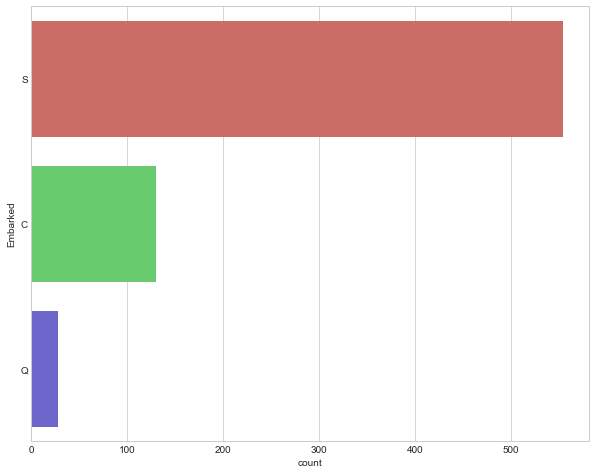

In [21]:
sb.countplot(y='Embarked', data=titanic, palette='hls')

We see that the three categories of port of embarkation are S=Southampton, C=Cherbourg, and Q=Queenstown.

Let's check for missing values.

In [9]:
titanic.isnull().sum()

Embarked      2
Fare          0
Age         177
dtype: int64

In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
Embarked    889 non-null object
Fare        891 non-null float64
Age         714 non-null float64
dtypes: float64(2), object(1)
memory usage: 21.0+ KB


In this case, let's just drop the observations for whom we don't have data on age or embarkation.

In [11]:
titanic.dropna(inplace=True)
titanic.head()

,Embarked,Fare,Age
0,S,7.2500,22.0
1,C,71.2833,38.0
2,S,7.9250,26.0
3,S,53.1000,35.0
4,S,8.0500,35.0


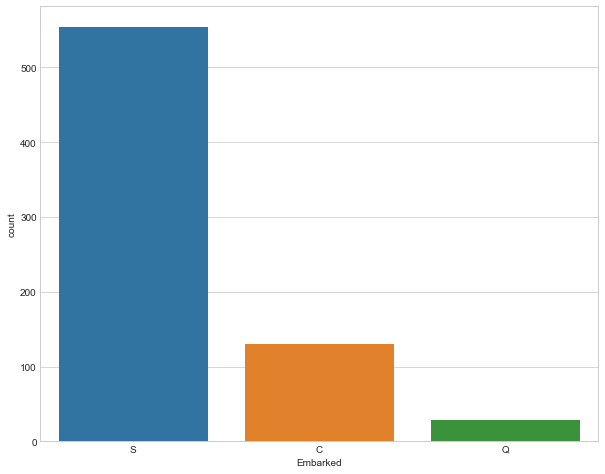

In [20]:
sb.countplot(data = titanic, x = 'Embarked')

In [14]:
sb.countplot?

Let's set S=Southampton as our reference category because it is big. We would not want to do this if we wanted to estimate how the two regressors affect the probability of embarked=S (Southampton). Let's first separate the data into training set and test set.

In [22]:
LogisticRegression?

In [23]:
X = titanic[['Fare', 'Age']]
y = titanic[['Embarked']]
# This function train_test_split is from sklearn.cross_validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .5,
                                                    random_state=25)

MultLogReg = LogisticRegression(multi_class='multinomial', solver='newton-cg')
MultLogReg.fit(X_train, y_train)

/Users/laurencewarner/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
l= [X_train, X_test, y_train, y_test]

In [25]:
y_pred = MultLogReg.predict(X_test)
y_pred

array(['S', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S',
       'S', 'C', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S',
       'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S

In [26]:
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[  7,   0,  52],
       [  0,   0,  16],
       [ 14,   0, 267]])

In [27]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          C       0.33      0.12      0.17        59
          Q       0.00      0.00      0.00        16
          S       0.80      0.95      0.87       281

avg / total       0.68      0.77      0.71       356



/Users/laurencewarner/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 1.4. Other GLM models in scikit-learn
The scikit-learn package has a [number of other](http://scikit-learn.org/stable/modules/linear_model.html) GLM models: OLS, Ridge regression, Lasso, Multi-task Lasso, Elastic Net, Multi-task Elastic Net, Least Angle Regression, LARS Lasso, Orthogonal Matching Pursuit (OMP), Bayesian regression, Logistic regression (including multinomial logistic regression), Stochastic Gradient Descent (SGD), Perceptron, Passive Aggressive Algorithms, Robustness regression, and Polynomial regression.